# Data exploration and enrichment for supervised classification

## Introduction

#### The analyzed dataset contains clinical records of 165 patients diagnosed with hepatocellular carcinoma (HCC), collected at the Centro Hospitalar e Universitário de Coimbra in Portugal. The main goal of this project is to develop a machine learning pipeline capable of determining the survivability of patients at 1 year after diagnosis.

## Data Exploration

In [17]:
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import pandas as pd
from pandas import read_table, read_csv
import seaborn as sns

### Checking and filling missing values

#### It's important to clarify that in this data set '?' should be considered as missing values.

In [18]:
hcc= pd.read_csv("hcc_dataset.csv", sep= ",", na_values= ['?'])
hcc.Encephalopathy

0      No
1      No
2      No
3      No
4      No
       ..
160    No
161    No
162    No
163    No
164    No
Name: Encephalopathy, Length: 165, dtype: object

#### -Checking the amount of missing values on each feature

In [19]:
print(hcc.head())
hcc.isnull().sum().sort_values(ascending=False)

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      NaN      No    No    No    No   Yes       Yes     NaN     NaN   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...    ALP   TP Creatinine Nodules Major_Dim Dir_Bil  Iron   Sat Ferritin  \
0  ...  150.0  7.1       0.70     1.0       3.5     0.5   NaN   NaN      NaN   
1  ...    NaN  NaN        NaN     1.0       1.8     NaN   NaN   NaN      NaN   
2  ...  109.0  7.0       2.10     5.0      13.0     0.1  28.0   6.0     16.0   
3  ...  174.0  8.1       1.11     2.0      15.7     0.2   NaN   NaN      NaN   
4  ...  109.0  6.9       1.80     1.0       9.0     NaN  59.0  15.0     22.0   

   Class  
0  Lives  
1  Lives  
2  Li

Ferritin          80
Sat               80
Iron              79
Packs_year        53
Varices           52
Grams_day         48
Dir_Bil           44
Smoking           41
HBeAg             39
Endemic           39
HBcAb             24
Hemochro          23
NASH              22
Major_Dim         20
Symptoms          18
HBsAg             17
Spleno            15
HIV               14
TP                11
PHT               11
Obesity           10
HCVAb              9
AFP                8
Creatinine         7
Albumin            6
Total_Bil          5
INR                4
ALT                4
Metastasis         4
AST                3
Leucocytes         3
Platelets          3
PVT                3
MCV                3
Hemoglobin         3
Ascites            3
ALP                3
AHT                3
Diabetes           3
GGT                3
Hallmark           2
CRI                2
Nodules            2
Encephalopathy     1
Gender             0
PS                 0
Age                0
Cirrhosis    

#### -It's very important to calculate the mean of numerical columns to be able to properly fill the missing values on each column with the mean. The method being used to fill the missing values is called "Mean imputation". 

####  -On non-numerical columns, we will visually analyze and the majority will the object to be filled on empty rows. This method is called "Mode Imputation"

In [20]:
#mean of numerical columns
age_mean= hcc.Age.mean() 
print("Mean of age: %.2f" % age_mean)
Grams_day_mean= hcc.Grams_day.mean()
print("Mean of gramps per day:%.2f" % Grams_day_mean)
Packs_year_mean= hcc.Packs_year.mean()
print("Mean of packs per year: %.2f" % Packs_year_mean)
INR_mean= hcc.INR.mean()
print("Mean of INR: %.2f" % INR_mean)
AFP_mean= hcc.AFP.mean()
print("Mean of AFP: %.2f" % AFP_mean)
hemoglobin_mean= hcc.Hemoglobin.mean()
print("Mean of hemoglobin: %.2f" % hemoglobin_mean)
MCV_mean= hcc.MCV.mean()
print("Mean of MCV: %.2f" % MCV_mean)
leucocytes_mean= hcc.Leucocytes.mean()
print("Mean of leucocytes: %.2f" % leucocytes_mean)
platelets_mean= hcc.Platelets.mean()
print("Mean of platelets: %.2f" % platelets_mean)
albumin_mean= hcc.Albumin.mean()
print("Mean of Albumin: %.2f" % albumin_mean)
total_bil_mean= hcc.Total_Bil.mean()
print("Mean of Total bil: %.2f" % total_bil_mean)
alt_mean= hcc.ALT.mean()
print("Mean of ALT: %.2f" % alt_mean)
ast_mean= hcc.AST.mean()
print("Mean of AST: %.2f" % ast_mean)
ggt_mean= hcc.GGT.mean()
print("Mean og GGT: %.2f" % ggt_mean)
alp_mean= hcc.ALP.mean()
print("Mean of ALP: %.2f" % alp_mean)
tp_mean= hcc.TP.mean()
print("Mean of TP: %.2f" % tp_mean)
creatinine_mean= hcc.Creatinine.mean()
print("Mean of Creatinine: %.2f" % creatinine_mean)
nodules_mean= hcc.Nodules.mean()
print("Mean of Nodules: %.2f" % nodules_mean)
major_dim_mean= hcc.Major_Dim.mean()
print("Mean of Major dim: %.2f" % major_dim_mean)
dir_bil_mean= hcc.Dir_Bil.mean()
print("Mean of Dir bil: %.2f" % dir_bil_mean)
iron_mean= hcc.Iron.mean()
print("Mean of Iron: %.2f" % iron_mean)
sat_mean= hcc.Sat.mean()
print("Mean of Sat: %.2f" % sat_mean)
ferritin_mean= hcc.Ferritin.mean()
print("Mean of ferritin: %.2f" % ferritin_mean)

Mean of age: 64.69
Mean of gramps per day:71.01
Mean of packs per year: 20.46
Mean of INR: 1.42
Mean of AFP: 19299.95
Mean of hemoglobin: 12.88
Mean of MCV: 95.12
Mean of leucocytes: 1473.96
Mean of platelets: 113206.44
Mean of Albumin: 3.45
Mean of Total bil: 3.09
Mean of ALT: 67.09
Mean of AST: 96.38
Mean og GGT: 268.03
Mean of ALP: 212.21
Mean of TP: 8.96
Mean of Creatinine: 1.13
Mean of Nodules: 2.74
Mean of Major dim: 6.85
Mean of Dir bil: 1.93
Mean of Iron: 85.60
Mean of Sat: 37.03
Mean of ferritin: 439.00


### Percentage of each gender

In [21]:
hcc_comp= pd.read_csv("dataset_comp.csv", sep= ",")
gender_count= hcc['Gender'].value_counts(normalize= True) 
print(gender_count)
gender_percentages= gender_count* 100
print(gender_percentages)

Gender
Male      0.806061
Female    0.193939
Name: proportion, dtype: float64
Gender
Male      80.606061
Female    19.393939
Name: proportion, dtype: float64


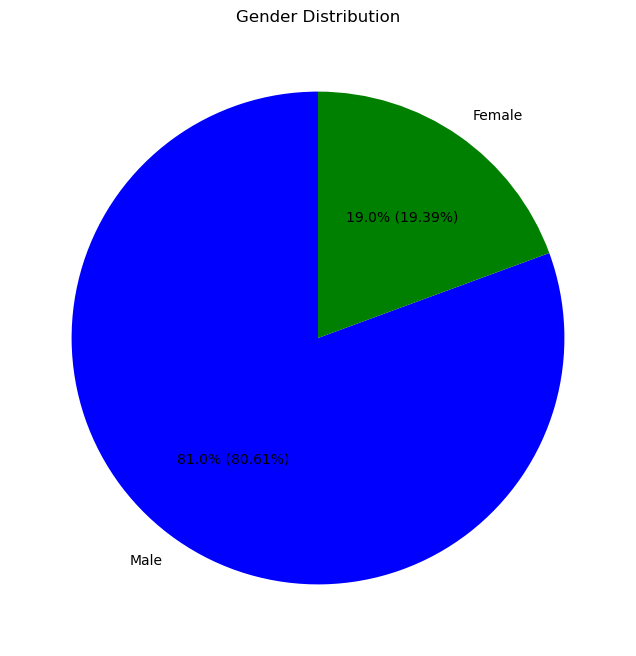

In [22]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:.1f}% ({p:.2f}%)'.format(p=pct, v=val)
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct=autopct_format(gender_percentages), startangle=90, colors=['b', 'g'])
plt.title('Gender Distribution')
plt.show()

In [23]:
print(hcc_comp.head())
# Calculate the percentage of each class within each gender
gender_class_distribution = hcc_comp.groupby('Gender')['Class'].value_counts(normalize=True).mul(100)
gender_class_percentages = gender_class_distribution.reset_index(name='Percentage')
print(gender_class_percentages)

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      Yes      No    No    No    No   Yes       Yes      No      No   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...    ALP   TP Creatinine Nodules Major_Dim Dir_Bil  Iron   Sat Ferritin  \
0  ...  150.0  7.1       0.70       1       3.5    0.50  85.5  37.0    295.0   
1  ...  212.0  8.9       1.12       1       1.8    1.93  85.5  37.0    295.0   
2  ...  109.0  7.0       2.10       5      13.0    0.10  28.0   6.0     16.0   
3  ...  174.0  8.1       1.11       2      15.7    0.20  85.5  37.0    295.0   
4  ...  109.0  6.9       1.80       1       9.0    1.93  59.0  15.0     22.0   

   Class  
0  Lives  
1  Lives  
2  Li

### Survival percentage for each gender

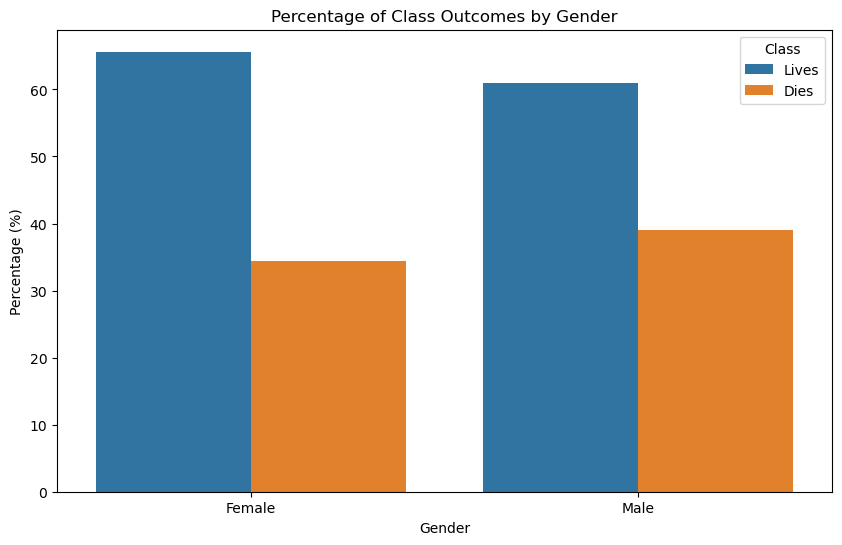

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Percentage', hue='Class', data=gender_class_percentages)
plt.title('Percentage of Class Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.show()

## Data preprocessing

### -Since there are some catergorical 

In [30]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

#Carregando o dataset
hcc = pd.read_csv("hcc_dataset.csv", sep=",")

#Ajetiando os valores nulos
hcc.replace(np.nan, 'None', inplace=True) #Na tabela tem células com o valor None que ele interpreta como um np.nan, então precisamos garantir que ele vai entender isso como um valor válido
hcc.replace('?', np.nan, inplace=True) #As células vazias possuem uma '?', então aqui dizemos que essas células sõa NaN 

for column in hcc.columns:
    #Convertendo os valores que são numéricos para float
    if hcc[column].dtype == 'object':
        try:
            if hcc[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().any() and column != 'Nodules':
                hcc[column] = pd.to_numeric(hcc[column], errors='coerce')
        except ValueError:
            try:
                hcc[column] = pd.to_datetime(hcc[column], errors='coerce')
            except ValueError:
                pass

    #Tratando os valores de texto -  colocando para UPPERCASE e colocando algum valor nas células vazias
    if(hcc[column].dtype == 'object'):
        hcc[column] = hcc[column].str.upper()
        value = hcc[column].value_counts().idxmax() # para variáveis categóricas colocamos o valor mais frequente
    else:
        value = hcc[column].mean() # para valores numéricos colocamos a média
    hcc[column].replace(np.nan, value, inplace=True)


In [31]:
# Criando uma cópia do dataset original para encoding
encoded_hcc = deepcopy(hcc)

# Definindo as colunas com classificação ordinal
columns_classification = {
    'PS': ['ACTIVE', 'RESTRICTED', 'AMBULATORY', 'SELFCARE', 'DISABLED'],
    'Encephalopathy': ['NONE', 'GRADE I/II', 'GRADE III/IV'],
    'Ascites': ['NONE', 'MILD', 'MODERATE/SEVERE']
}

# Transformando as variáveis categóricas em números
for column in encoded_hcc.columns:
    if encoded_hcc[column].dtype == 'object' and column != 'Nodules':  # Verifica se é categórica e não 'Nodules'
        if column in columns_classification:
            # Ensure correct usage of OrdinalEncoder
            categories = [columns_classification[column] + ['UNKNOWN']]  # Adding 'UNKNOWN' to handle unexpected categories
            encoded_hcc[column] = encoded_hcc[column].apply(lambda x: x if x in columns_classification[column] else 'UNKNOWN')
            enc = OrdinalEncoder(categories=categories)
            enc_transform = pd.DataFrame(enc.fit_transform(encoded_hcc[[column]]), columns=[column])
        else:
            enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            enc_transform = enc.fit_transform(encoded_hcc[[column]])
            enc_transform = pd.DataFrame(enc_transform, columns=enc.get_feature_names_out([column]))
        
        # Tratamento especial para colunas específicas
        if not(column in columns_classification or column == 'Gender' or column == 'Class'):
            enc_transform = enc_transform.filter(regex='_YES$')  # Filtrar apenas colunas com '_YES$'
        elif column == 'Gender':
            enc_transform = enc_transform.filter(regex='_MALE$')  # Considerar apenas '_MALE$'
        elif column == 'Class':
            enc_transform = enc_transform.filter(regex='_LIVES$')  # Considerar apenas '_LIVES$'

        encoded_hcc = encoded_hcc.drop(columns=[column])  # Excluir a coluna original
        encoded_hcc = pd.concat([encoded_hcc, enc_transform], axis=1)  # Concatenar a transformação ao dataset

# Salvar o DataFrame transformado em um novo arquivo CSV
encoded_hcc.to_csv('encoded_hcc.csv', index=False)  # Salvar o DataFrame codificado em um arquivo CSV

In [32]:
encoded_hcc

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,Varices_YES,Spleno_YES,PHT_YES,PVT_YES,Metastasis_YES,Hallmark_YES,PS,Encephalopathy,Ascites,Class_LIVES
0,67,137.000000,15.000000,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
1,62,0.000000,20.464286,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
2,78,50.000000,50.000000,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0
3,77,40.000000,30.000000,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0
4,76,100.000000,30.000000,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,71.008547,20.464286,0.840000,19299.951146,15.400000,109.200000,9.300000,184000.000000,4.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0
161,68,0.000000,0.000000,1.330000,4887.000000,12.100000,88.900000,2.500000,141.000000,3.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,3.0,0.0
162,65,71.008547,48.000000,1.130000,75.000000,13.300000,90.000000,8.000000,385000.000000,4.300000,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
163,44,71.008547,20.464286,2.140000,94964.000000,15.600000,117.300000,5200.000000,118000.000000,4.800000,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.0


### Data Scalling

In [33]:
colunas_numericas = encoded_hcc.select_dtypes(include=['int', 'float']).columns #seleciona apenas as colunas numéricas
colunas_nao_numericas=encoded_hcc.select_dtypes(exclude=['int', 'float']).columns#exclui as colunas numéricas, para depois concatenarmos com a anterior
scaler=MinMaxScaler()
dados_escalados_numericos=scaler.fit_transform(encoded_hcc[colunas_numericas])#chamamos o MinMaxScaler pra ele transformar os dados, somente das colunas numéricas
dados_escalados_numericos=pd.DataFrame(dados_escalados_numericos,columns=colunas_numericas) ## converte o array numpy dos dados escalados de volta para um DataFrame com os nomes originais das colunas numéricas
dados_escalados = pd.concat([dados_escalados_numericos, encoded_hcc[colunas_nao_numericas]], axis=1)#concatena os dados numéricos escalonadas com os dados das colunas não numéricas

### Selecting the most important variables, to be used on knn algorithm 

In [36]:
#colunas selecionadas, a partir da relevância medida nas etapas anteriores
colunas_selecionadas=['Hemoglobin','Iron','Albumin','Sat','MCV','AFP','Ferritin','ALP', 'PS','Symptoms_YES','Ascites','Metastasis_YES','Encephalopathy','Class_LIVES']
dados_selecionados=dados_escalados[colunas_selecionadas].copy()

In [38]:
dados_selecionados

,Hemoglobin,Iron,Albumin,Sat,MCV,AFP,Ferritin,ALP,PS,Symptoms_YES,Ascites,Metastasis_YES,Encephalopathy,Class_LIVES
0,0.635036,0.382138,0.500000,0.293880,0.740519,0.000052,0.196860,0.151954,0.0,0.0,1.000000,0.0,1.0,1.0
1,0.575110,0.382138,0.515178,0.293880,0.511372,0.010660,0.196860,0.215518,0.0,1.0,1.000000,0.0,1.0,1.0
2,0.284672,0.125000,0.466667,0.047619,0.205589,0.000003,0.007175,0.110062,0.5,0.0,0.333333,1.0,1.0,1.0
3,0.613139,0.382138,0.600000,0.293880,0.550898,0.001347,0.196860,0.176475,0.0,1.0,1.000000,1.0,1.0,0.0
4,0.678832,0.263393,0.733333,0.119048,0.510978,0.000026,0.009865,0.110062,0.0,1.0,1.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.759124,0.382138,0.900000,0.293880,0.792415,0.010660,0.196860,0.110062,0.0,0.0,1.000000,0.0,1.0,1.0
161,0.518248,0.382138,0.366667,0.293880,0.387226,0.002699,0.196860,0.284780,0.5,1.0,1.000000,0.0,1.0,0.0
162,0.605839,0.382138,0.800000,0.293880,0.409182,0.000041,0.196860,0.183628,0.0,0.0,1.000000,0.0,1.0,1.0
163,0.773723,0.382138,0.966667,0.293880,0.954092,0.052456,0.196860,0.172388,0.5,0.0,1.000000,1.0,1.0,0.0


## Data Modelling

#### Splitting 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Separar as variáveis preditoras (X) e a variável alvo (y)
X = dados_selecionados.drop(columns=['Class_LIVES'])
y = dados_selecionados['Class_LIVES']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)